# Visualizing wave data

Loading packages

In [1]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5pyd
import rex
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

import h5py
import time
from scipy.interpolate import interp1d
from scipy.spatial import cKDTree
from tqdm.notebook import trange, tqdm

from datetime import datetime, timedelta
import pylab
from matplotlib import rcParams

Loading data

2006

In [13]:
#loading time series data for 2006
path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/wave_time_series/wave_data_syn_2006.csv'
wave_data_2006 = pd.read_csv(path, index_col='time')
wave_data_2006

,count,loc_id,lat,lon,significant_wave_height_m,peak_period_s,capacity_factor
time,,,,,,,
2006-01-01 00:00:00+00:00,0,312809,35.6043,-122.029,3.40128,13.3268,0.597327
2006-01-01 03:00:00+00:00,0,312809,35.6043,-122.029,3.53424,13.3268,0.635986
2006-01-01 06:00:00+00:00,0,312809,35.6043,-122.029,3.77443,13.3268,0.705561
2006-01-01 09:00:00+00:00,0,312809,35.6043,-122.029,3.80797,13.3268,0.714954
2006-01-01 12:00:00+00:00,0,312809,35.6043,-122.029,3.85934,13.3268,0.729340
...,...,...,...,...,...,...,...
2006-12-31 09:00:00+00:00,293,347193,35.4567,-121.525,3.94249,16.1260,0.445535
2006-12-31 12:00:00+00:00,293,347193,35.4567,-121.525,3.84103,16.1260,0.438990
2006-12-31 15:00:00+00:00,293,347193,35.4567,-121.525,3.68984,14.6597,0.549418


Isolating loc 0

In [14]:
loc_0 = wave_data_2006.loc[wave_data_2006['count'] == 0]

isolating loc 80

In [22]:
loc_80 = wave_data_2006.loc[wave_data_2006['count'] == 80]

isolating loc 160

In [20]:
loc_160 = wave_data_2006.loc[wave_data_2006['count'] == 160]

isolating buoy 240

In [23]:
loc_240 = wave_data_2006.loc[wave_data_2006['count'] == 240]

## Plotting annual and diurnal trends in capacity factor

Entire year

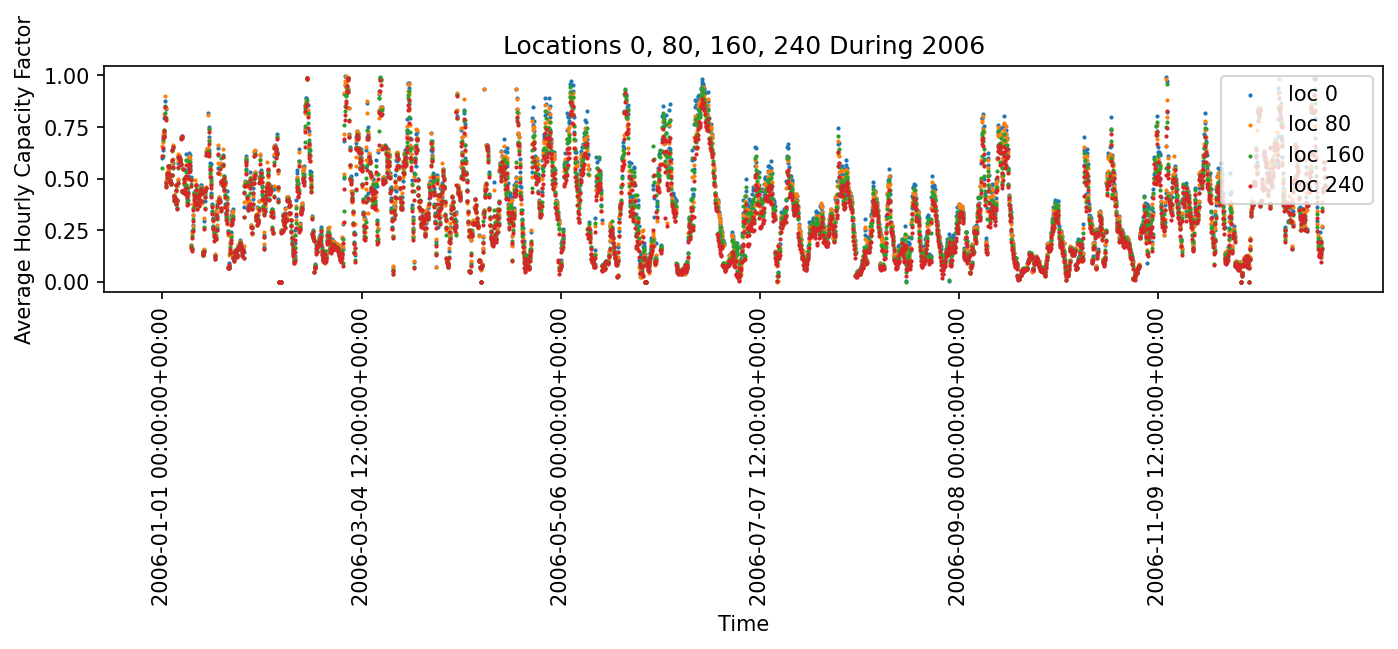

In [25]:
loc_0 = loc_0.reset_index(drop=False)
loc_80 = loc_80.reset_index(drop=False)
loc_160 = loc_160.reset_index(drop=False)
loc_240 = loc_240.reset_index(drop=False)
fig = plt.figure(figsize=(11,2), dpi=150)
#plt.plot()
plt.title('Locations 0, 80, 160, 240 During 2006')
plt.scatter(loc_0['time'], loc_0['capacity_factor'], s=1)
plt.scatter(loc_80['time'], loc_80['capacity_factor'], s=1)
plt.scatter(loc_160['time'], loc_160['capacity_factor'], s=1)
plt.scatter(loc_240['time'], loc_240['capacity_factor'], s=1)
plt.xlabel('Time')
plt.ylabel('Average Hourly Capacity Factor')
plt.legend(['loc 0', 'loc 80','loc 160', 'loc 240'])
ticks = plt.xticks(loc_0['time'].values[::500], rotation=90)
plt.show()

Each month

In [26]:
loc_0 = loc_0.reset_index(drop=False)
loc_0.loc[:,'time']=loc_0.loc[:,'time'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S%z'))
loc_0

,level_0,index,time,count,loc_id,lat,lon,significant_wave_height_m,peak_period_s,capacity_factor
0,0,0,2006-01-01 00:00:00+00:00,0,312809,35.6043,-122.029,3.40128,13.3268,0.597327
1,1,1,2006-01-01 03:00:00+00:00,0,312809,35.6043,-122.029,3.53424,13.3268,0.635986
2,2,2,2006-01-01 06:00:00+00:00,0,312809,35.6043,-122.029,3.77443,13.3268,0.705561
3,3,3,2006-01-01 09:00:00+00:00,0,312809,35.6043,-122.029,3.80797,13.3268,0.714954
4,4,4,2006-01-01 12:00:00+00:00,0,312809,35.6043,-122.029,3.85934,13.3268,0.729340
...,...,...,...,...,...,...,...,...,...,...
2915,2915,2915,2006-12-31 09:00:00+00:00,0,312809,35.6043,-122.029,4.04898,16.1260,0.452404
2916,2916,2916,2006-12-31 12:00:00+00:00,0,312809,35.6043,-122.029,3.87713,14.6597,0.584346
2917,2917,2917,2006-12-31 15:00:00+00:00,0,312809,35.6043,-122.029,3.69305,14.6597,0.550188
2918,2918,2918,2006-12-31 18:00:00+00:00,0,312809,35.6043,-122.029,3.51759,14.6597,0.508128


In [31]:
initial_date='2006-01-01 00:00:00+00:00'
final_date='2006-02-01 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
jan_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [32]:
initial_date='2006-02-01 00:00:00+00:00'
final_date='2006-03-01 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
feb_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [33]:
initial_date='2006-03-01 00:00:00+00:00'
final_date='2006-04-01 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
mar_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [34]:
initial_date='2006-04-01 00:00:00+00:00'
final_date='2006-05-01 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
apr_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [35]:
initial_date='2006-05-01 00:00:00+00:00'
final_date='2006-06-01 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
may_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [36]:
initial_date='2006-06-01 00:00:00+00:00'
final_date='2006-07-01 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
jun_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [37]:
initial_date='2006-07-01 00:00:00+00:00'
final_date='2006-08-01 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
jul_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [38]:
initial_date='2006-08-01 00:00:00+00:00'
final_date='2006-09-01 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
aug_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [39]:
initial_date='2006-09-01 00:00:00+00:00'
final_date='2006-10-01 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
sep_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [40]:
initial_date='2006-10-01 00:00:00+00:00'
final_date='2006-11-01 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
oct_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [41]:
initial_date='2006-11-01 00:00:00+00:00'
final_date='2006-12-01 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
nov_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [42]:
initial_date='2006-12-01 00:00:00+00:00'
final_date='2007-01-01 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
dec_loc_0 = loc_0[loc_0['time'].isin(range_time)]

Text(0.5, 1.0, 'Dec.')

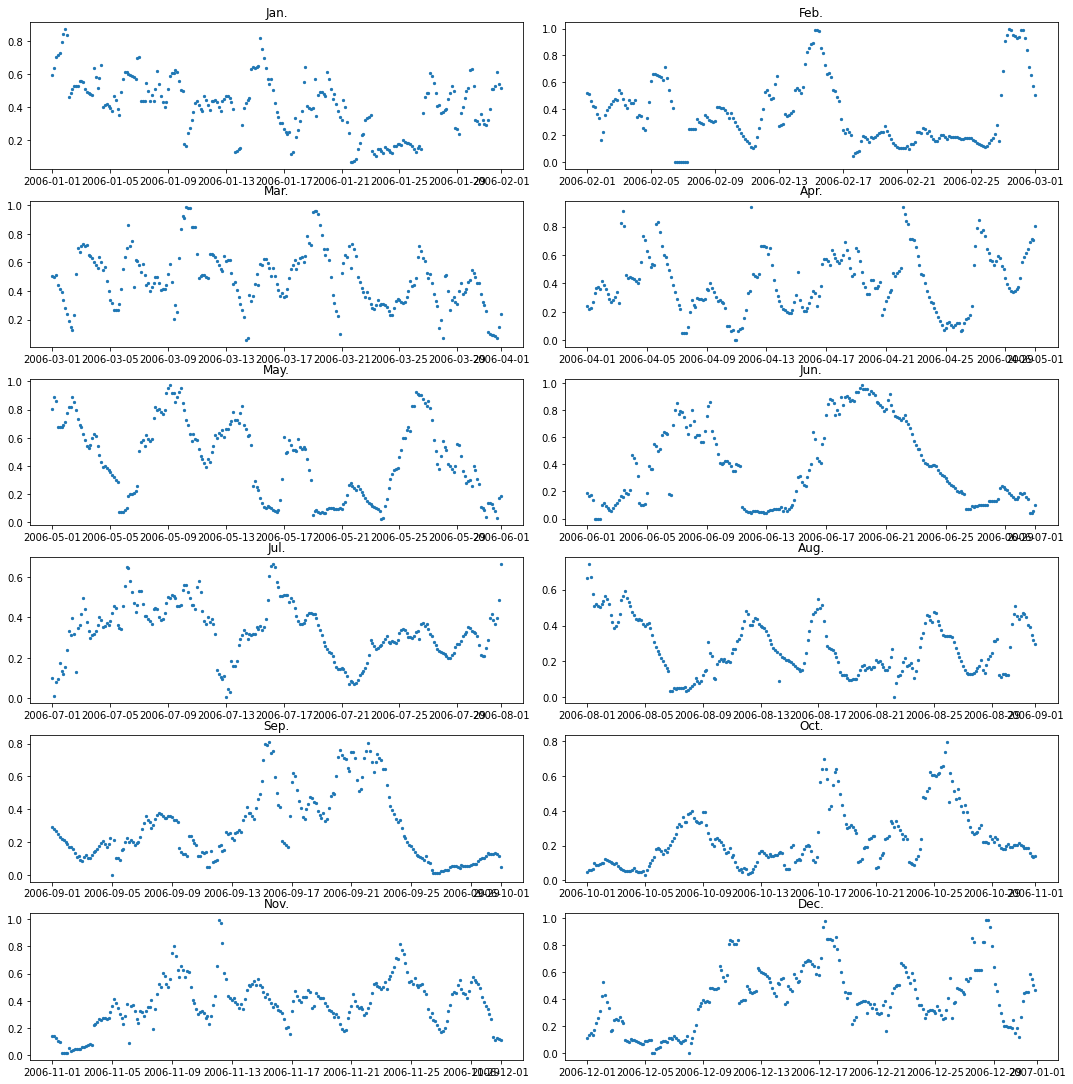

In [43]:
x1 = jan_loc_0['time']
y1 = jan_loc_0['capacity_factor']
x2 = feb_loc_0['time']
y2 = feb_loc_0['capacity_factor']
x3 = mar_loc_0['time']
y3 = mar_loc_0['capacity_factor']
x4 = apr_loc_0['time']
y4 = apr_loc_0['capacity_factor']
x5 = may_loc_0['time']
y5 = may_loc_0['capacity_factor']
x6 = jun_loc_0['time']
y6 = jun_loc_0['capacity_factor']
x7 = jul_loc_0['time']
y7 = jul_loc_0['capacity_factor']
x8 = aug_loc_0['time']
y8 = aug_loc_0['capacity_factor']
x9 = sep_loc_0['time']
y9 = sep_loc_0['capacity_factor']
x10 = oct_loc_0['time']
y10 = oct_loc_0['capacity_factor']
x11 = nov_loc_0['time']
y11 = nov_loc_0['capacity_factor']
x12 = dec_loc_0['time']
y12 = dec_loc_0['capacity_factor']

figure, axes = plt.subplots(6, 2, figsize=(15, 15))
figure.tight_layout()
axe = axes.ravel()
ax1 = axe[0]
ax2 = axe[1]
ax3 = axe[2]
ax4 = axe[3]
ax5 = axe[4]
ax6 = axe[5]
ax7 = axe[6]
ax8 = axe[7]
ax9 = axe[8]
ax10 = axe[9]
ax11 = axe[10]
ax12 = axe[11]

ax1.scatter(x1, y1, s=5)
ax1.set_title('Jan.')
ax2.scatter(x2, y2, s=5)
ax2.set_title('Feb.')
ax3.scatter(x3, y3, s=5)
ax3.set_title('Mar.')
ax4.scatter(x4, y4, s=5)
ax4.set_title('Apr.')
ax5.scatter(x5, y5, s=5)
ax5.set_title('May.')
ax6.scatter(x6, y6, s=5)
ax6.set_title('Jun.')
ax7.scatter(x7, y7, s=5)
ax7.set_title('Jul.')
ax8.scatter(x8, y8, s=5)
ax8.set_title('Aug.')
ax9.scatter(x9, y9, s=5)
ax9.set_title('Sep.')
ax10.scatter(x10, y10, s=5)
ax10.set_title('Oct.')
ax11.scatter(x11, y11, s=5)
ax11.set_title('Nov.')
ax12.scatter(x12, y12, s=5)
ax12.set_title('Dec.')

First 4 weeks of the year

In [44]:
initial_date='2006-01-01 00:00:00+00:00'
final_date='2006-01-08 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
week1_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [45]:
initial_date='2006-01-08 00:00:00+00:00'
final_date='2006-01-15 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
week2_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [46]:
initial_date='2006-01-15 00:00:00+00:00'
final_date='2006-01-22 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
week3_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [47]:
initial_date='2006-01-22 00:00:00+00:00'
final_date='2006-02-01 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
week4_loc_0 = loc_0[loc_0['time'].isin(range_time)]

Text(0.5, 1.0, 'week 4')

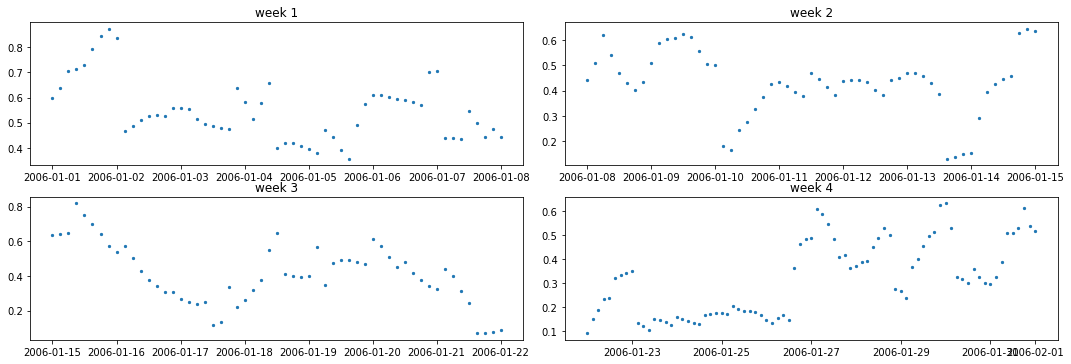

In [48]:
x1 = week1_loc_0['time']
y1 = week1_loc_0['capacity_factor']
x2 = week2_loc_0['time']
y2 = week2_loc_0['capacity_factor']
x3 = week3_loc_0['time']
y3 = week3_loc_0['capacity_factor']
x4 = week4_loc_0['time']
y4 = week4_loc_0['capacity_factor']

figure, axes = plt.subplots(2, 2, figsize=(15, 5))
figure.tight_layout()
axe = axes.ravel()
ax1 = axe[0]
ax2 = axe[1]
ax3 = axe[2]
ax4 = axe[3]

ax1.scatter(x1, y1, s=5)
ax1.set_title('week 1')
ax2.scatter(x2, y2, s=5)
ax2.set_title('week 2')
ax3.scatter(x3, y3, s=5)
ax3.set_title('week 3')
ax4.scatter(x4, y4, s=5)
ax4.set_title('week 4')

4 random days

In [49]:
initial_date='2006-01-12 00:00:00+00:00'
final_date='2006-01-13 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
day1_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [50]:
initial_date='2006-04-12 00:00:00+00:00'
final_date='2006-04-13 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
day2_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [51]:
initial_date='2006-07-12 00:00:00+00:00'
final_date='2006-07-13 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
day3_loc_0 = loc_0[loc_0['time'].isin(range_time)]

In [52]:
initial_date='2006-10-12 00:00:00+00:00'
final_date='2006-10-13 00:00:00+00:00'

initial_date = datetime.strptime(str(initial_date), '%Y-%m-%d %H:%M:%S%z')
final_date = datetime.strptime(str(final_date), '%Y-%m-%d %H:%M:%S%z')

range_time = pd.date_range(start=initial_date, end=final_date, freq="1h")
day4_loc_0 = loc_0[loc_0['time'].isin(range_time)]

Text(0.5, 1.0, 'day 4')

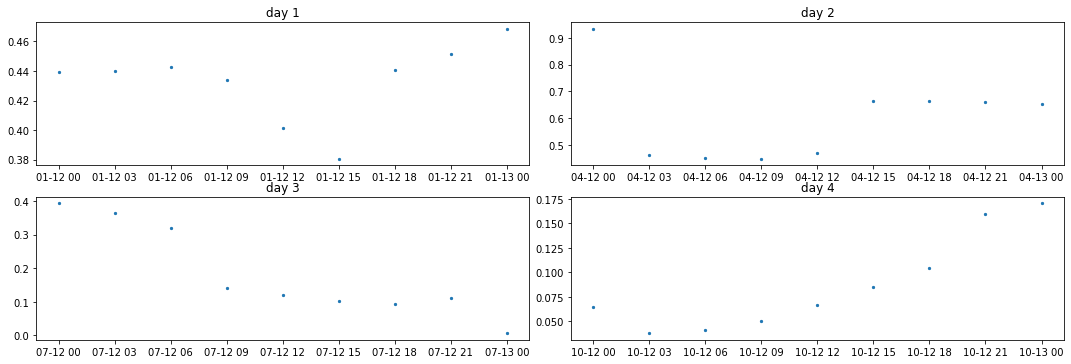

In [53]:
x1 = day1_loc_0['time']
y1 = day1_loc_0['capacity_factor']
x2 = day2_loc_0['time']
y2 = day2_loc_0['capacity_factor']
x3 = day3_loc_0['time']
y3 = day3_loc_0['capacity_factor']
x4 = day4_loc_0['time']
y4 = day4_loc_0['capacity_factor']

figure, axes = plt.subplots(2, 2, figsize=(15, 5))
figure.tight_layout()
axe = axes.ravel()
ax1 = axe[0]
ax2 = axe[1]
ax3 = axe[2]
ax4 = axe[3]

ax1.scatter(x1, y1, s=5)
ax1.set_title('day 1')
ax2.scatter(x2, y2, s=5)
ax2.set_title('day 2')
ax3.scatter(x3, y3, s=5)
ax3.set_title('day 3')
ax4.scatter(x4, y4, s=5)
ax4.set_title('day 4')